In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn.datasets import make_classification

In [6]:
from sklearn.model_selection import train_test_split

x,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [7]:
x.shape

(2000, 20)

In [8]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

y_train_pred = rf_model.predict_proba(x_train)
print("RF train roc_auc : {}".format(roc_auc_score(y_train,y_train_pred[:,-1])))

ytest_pred=rf_model.predict_proba(x_test)
print("RF test roc-auc : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc_auc : 0.9999999999999999
RF test roc-auc : 0.9814944444444444


In [25]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
log_classifier.fit(x_train,y_train)

y_train_pred = log_classifier.predict_proba(x_train)
print("Logistic train roc_auc : {}".format(roc_auc_score(y_train,y_train_pred[:,-1])))

ytest_pred=log_classifier.predict_proba(x_test)
print("Logistic test roc-auc : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

Logistic train roc_auc : 0.9863568922694498
Logistic test roc-auc : 0.9885777777777777


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)

y_train_pred = knn_classifier.predict_proba(x_train)
print("KNN Neighbours train roc_auc : {}".format(roc_auc_score(y_train,y_train_pred[:,-1])))

ytest_pred=knn_classifier.predict_proba(x_test)
print("KNN Neighbours test roc-auc : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

KNN Neighbours train roc_auc : 0.981670071491109
KNN Neighbours test roc-auc : 0.9426111111111111


In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train,y_train)

y_train_pred = ada_classifier.predict_proba(x_train)
print("AdaBoost train roc_auc : {}".format(roc_auc_score(y_train,y_train_pred[:,-1])))

ytest_pred=ada_classifier.predict_proba(x_test)
print("AdaBoost test roc-auc : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

AdaBoost train roc_auc : 0.9975081174960356
AdaBoost test roc-auc : 0.9826111111111111


In [39]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))

final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble test roc-auc : {}".format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc : 0.9847333333333333


In [40]:
pred


[0      0.99
 1      0.01
 2      0.98
 3      0.92
 4      0.50
        ... 
 595    0.00
 596    0.02
 597    0.98
 598    0.00
 599    0.98
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [41]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.50,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [42]:
final_prediction

0      0.885262
1      0.118323
2      0.821283
3      0.747853
4      0.542447
         ...   
595    0.121340
596    0.115345
597    0.874197
598    0.160717
599    0.832357
Length: 600, dtype: float64

In [43]:
fpr,tpr,thresholds = roc_curve(y_test , final_prediction)

In [44]:
thresholds

array([1.9109413 , 0.9109413 , 0.90922166, 0.90827475, 0.7994465 ,
       0.7980558 , 0.79762555, 0.79662833, 0.79130736, 0.79071156,
       0.76988614, 0.76787124, 0.72097576, 0.71137362, 0.70975181,
       0.70893711, 0.66601868, 0.65993537, 0.61029968, 0.60175354,
       0.58245356, 0.57236186, 0.55042732, 0.54969563, 0.53355932,
       0.51627948, 0.51115858, 0.50366892, 0.4546034 , 0.38905357,
       0.38879719, 0.35518074, 0.35086612, 0.24323004, 0.24140421,
       0.2321341 , 0.23146893, 0.21540022, 0.21348417, 0.12038782,
       0.1203351 , 0.10780895])

In [47]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
    y_pred = np.where(final_prediction > thres , 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred , normalize = True))

accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ["thresholds","accuracy"]
accuracy_ls.sort_values(by="accuracy",ascending=False , inplace =True)
accuracy_ls.head()


,thresholds,accuracy
28,0.454603,0.961667
27,0.503669,0.958333
25,0.516279,0.958333
26,0.511159,0.956667
24,0.533559,0.956667


In [48]:
accuracy_ls.head()

,thresholds,accuracy
28,0.454603,0.961667
27,0.503669,0.958333
25,0.516279,0.958333
26,0.511159,0.956667
24,0.533559,0.956667


In [50]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = "orange",label="Roc")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever Operating Characterstic (ROC) Curve")
    plt.legend()
    plt.show()

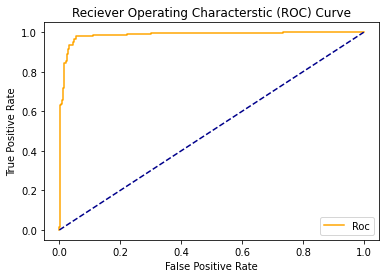

In [52]:
plot_roc_curve(fpr,tpr)